# MNIST + PCA
- Feat 784개 ==> 주요 Featrue로 압축

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets.mnist import load_data

### [1] 데이터 로딩

In [2]:
(x_train, y_train), (x_test, y_test)=load_data()
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

### [1-2] 데이터 전처리 및 형변환

In [3]:
# 0~1사이 범위값으로 Feature 정규화
x_train=x_train/255.0
x_test=x_test/255.0

In [4]:
# PCA 2차원 데이터 처리 : 3D => 2D 형변환
x_train=x_train.reshape(-1, 28*28)
x_test=x_test.reshape(-1, 28*28)
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## [2] MNIST의 PC(주성분 요소) 수 찾기

In [43]:
# PCA 객체 생성
pca=PCA(n_components=0.95)
pca2=PCA(n_components=0.5)

In [44]:
# PC 계산
pca.fit(x_train)
pca2.fit(x_train)

PCA(n_components=0.5)

In [7]:
# 주성분 행렬
pca.singular_values_

array([554.08236184, 473.79289646, 441.76832659, 412.90967564,
       392.45954891, 369.34743738, 321.72592959, 302.04650943,
       295.59576934, 273.06366032, 258.31039157, 252.97700677,
       232.98056847, 231.36547104, 223.47337767, 216.59463867,
       204.70103539, 200.98426661, 193.8016728 , 190.95856472,
       183.65236363, 178.45839561, 173.68452004, 169.90685928,
       167.17214551, 162.9474728 , 160.33074547, 157.72351701,
       153.49152274, 147.83552759, 144.28725   , 143.19277799,
       138.07150073, 136.22239172, 134.28567117, 131.13991042,
       126.49333601, 124.2313057 , 123.40999747, 122.22992796,
       120.20481924, 118.62713309, 115.06215042, 112.23881111,
       110.35705642, 108.93302362, 107.01475474, 105.46372614,
       103.71956692, 100.90840213, 100.45950025,  99.47658474,
        96.76475599,  95.60902108,  94.8075482 ,  92.66540711,
        92.3380578 ,  90.42557427,  89.59931997,  87.99801628,
        87.22623816,  87.0004999 ,  85.37550857,  83.71

In [8]:
# 주성분에 투영 후 분산 정도 설명
pca.explained_variance_ratio_ # 비율로

array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
       0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357001,
       0.0210919 , 0.02022991, 0.01715818, 0.01692111, 0.01578641,
       0.01482953, 0.01324561, 0.01276897, 0.01187263, 0.01152684,
       0.01066166, 0.01006713, 0.00953573, 0.00912544, 0.00883405,
       0.00839319, 0.00812579, 0.00786366, 0.00744733, 0.00690859,
       0.00658094, 0.00648148, 0.00602615, 0.00586582, 0.00570021,
       0.00543628, 0.00505786, 0.00487859, 0.00481429, 0.00472266,
       0.00456747, 0.00444836, 0.00418501, 0.00398215, 0.00384975,
       0.00375103, 0.00362009, 0.00351591, 0.00340058, 0.00321874,
       0.00319017, 0.00312805, 0.00295983, 0.00288955, 0.0028413 ,
       0.00271436, 0.00269521, 0.00258473, 0.00253771, 0.00244781,
       0.00240506, 0.00239263, 0.00230408, 0.00221532, 0.00213721,
       0.00207225, 0.00203043, 0.00196783, 0.00192853, 0.00188632,
       0.00186977, 0.00181083, 0.00177562, 0.00174898, 0.00165

In [45]:
# PC기반 데이터 투영
mnistPCA=pca.transform(x_train)
mnistPCA2=pca2.transform(x_train)

In [46]:
mnistPCA.shape, mnistPCA2.shape

((60000, 154), (60000, 11))

In [48]:
# 압축된 피쳐성분기반을 원래 성분으로 복원
reMnist=pca.inverse_transform(mnistPCA)
reMnist2=pca2.inverse_transform(mnistPCA2)

reMnist.shape, reMnist2.shape

((60000, 784), (60000, 784))

In [50]:
# PCA 전후 이미지 비교
def drawImage(selectImg, title):
    plt.imshow(selectImg.reshape(28, 28), cmap='gray')
    plt.title(f'[{title}]')
    plt.show()

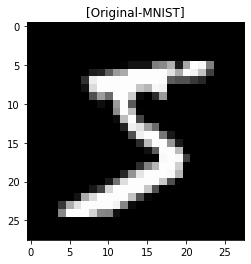

In [51]:
drawImage(x_train[0], 'Original-MNIST')

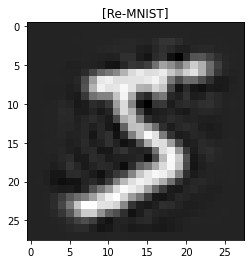

In [52]:
drawImage(reMnist[0], 'Re-MNIST')

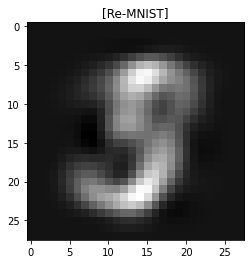

In [53]:
drawImage(reMnist2[0], 'Re-MNIST')